# Preprocessing CICIDS2018-Improved

In [1]:
# import pandas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
# import utils
import os
import glob
from tqdm import tqdm
import random
from matplotlib.ticker import FuncFormatter

In [2]:
NORMAL_LABEL = 0
ANORMAL_LABEL = 1
DOWNSAMPLE_FACTOR = 2e-1

np.random.seed(42)
random.seed(42)

In [7]:
def downsample(df, p):
    mask = np.random.randint(0, df.shape[0], int(df.shape[0] * p))
    df_ = df.iloc[mask]
    
    return df_

In [3]:
ROOT = "/Users/djk/Downloads/CSECICIDS2018_improved/"
path_to_folder = f'/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/{DOWNSAMPLE_FACTOR*100}'


In [9]:
list_dirs = [f'{ROOT}{f}' for f in os.listdir(ROOT)]
list_dirs

['/Users/djk/Downloads/CSECICIDS2018_improved/Thursday-22-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Friday-16-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Thursday-15-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Wednesday-14-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Tuesday-20-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Wednesday-21-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Friday-23-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Wednesday-28-02-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Friday-02-03-2018.csv',
 '/Users/djk/Downloads/CSECICIDS2018_improved/Thursday-01-03-2018.csv']

In [10]:
# For test purpose, randomly downsample the dataset
stats = []
if not os.path.exists(path_to_folder):
    os.makedirs(path_to_folder)
    
    
COLS_TO_DROP = ['id', 'Flow ID', 'Src IP','Timestamp', 'Dst IP', 'Fid']

for f in os.listdir(ROOT):
    df_x = pd.read_csv(os.path.join(ROOT,f))
    print(f"{f} : {df_x.shape}")
    
    # Drop target columns if they exist
    df_x.drop(columns=COLS_TO_DROP, errors='ignore', inplace=True)
    print(f"Downsampling...")
    df_ = downsample(df_x, DOWNSAMPLE_FACTOR)
    
    df_['Label_cat'] = df_['Label'].astype('category')
    df_['Label'] = df_['Label'].apply(lambda x: NORMAL_LABEL if x == 'BENIGN' else ANORMAL_LABEL)
    
    print(f"{f} : {df_.shape}")
    df_ = df_[df_['Attempted Category'] == -1]
    print(f"{f} : {df_.shape}")
    df_.drop(columns=['Attempted Category'], errors='ignore', inplace=True)
    
    export_to = f"{path_to_folder}/{f}"
    df_.to_csv(export_to)
    print(f'saved to : {export_to}') 

Thursday-22-02-2018.csv : (6071153, 91)
Downsampling...


/Users/djk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/djk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Thursday-22-02-2018.csv : (1214230, 87)
Thursday-22-02-2018.csv : (1214212, 87)
saved to : /Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Thursday-22-02-2018.csv
Friday-16-02-2018.csv : (7390266, 91)
Downsampling...
Friday-16-02-2018.csv : (1478053, 87)
Friday-16-02-2018.csv : (1456988, 87)
saved to : /Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Friday-16-02-2018.csv
Thursday-15-02-2018.csv : (5410102, 91)
Downsampling...
Thursday-15-02-2018.csv : (1082020, 87)
Thursday-15-02-2018.csv : (1080683, 87)
saved to : /Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Thursday-15-02-2018.csv
Wednesday-14-02-2018.csv : (5898350, 91)
Downsampling...
Wednesday-14-02-2018.csv : (1179670, 87)
Wednesday-14-02-2018.csv : (1140931, 87)
saved to : /Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Wedne

In [11]:
# df = pd.read_csv(list_dirs[0])

In [12]:
# df.describe()
# path_to_folder = '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved'
path_to_files = [f for f in glob.glob(f'{path_to_folder}/*.csv')]

In [13]:
path_to_files

['/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Thursday-22-02-2018.csv',
 '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Friday-16-02-2018.csv',
 '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Thursday-15-02-2018.csv',
 '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Wednesday-14-02-2018.csv',
 '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Tuesday-20-02-2018.csv',
 '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Wednesday-21-02-2018.csv',
 '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Friday-23-02-2018.csv',
 '/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Wednesday-28-

In [25]:
%%time
chunks = []
i = 0

for i, f in enumerate(path_to_files):

    print(f"Loading file [{i}/{len(path_to_files)}]--> {f}", end="\r")
    chunk = pd.read_csv(f)
    chunks.append(chunk)
    i += 1

CPU times: user 1min 36s, sys: 40.1 s, total: 2min 16sRCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved/20.0/Thursday-01-03-2018.csvv
Wall time: 2min 30s


In [26]:
%%time
df = pd.concat(chunks, ignore_index=True)

CPU times: user 8.05 s, sys: 23.5 s, total: 31.5 s
Wall time: 43.9 s


In [27]:
# df.Fid.value_counts()

In [28]:
df.drop(columns=['Unnamed: 0', 'Fid'], inplace=True, errors='ignore')
df

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Label_cat
0,40529,3389,6,9690163,12,7,1132,1581,661,0,...,694621,6561316.0,0.0,6561316,6561316,-1,-1,9690163,0,BENIGN
1,50490,80,6,7366490,7,7,872,1576,436,0,...,0,0.0,0.0,0,0,-1,-1,7366490,0,BENIGN
2,55049,53,17,2295,1,1,33,49,33,33,...,0,0.0,0.0,0,0,-1,-1,0,0,BENIGN
3,58907,53,17,1686,1,1,45,163,45,45,...,0,0.0,0.0,0,0,-1,-1,0,0,BENIGN
4,50875,53,17,644,1,1,35,51,35,35,...,0,0.0,0.0,0,0,-1,-1,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577732,51201,53,17,630,1,1,45,73,45,45,...,0,0.0,0.0,0,0,-1,-1,0,0,BENIGN
12577733,49857,53,17,895,1,1,47,132,47,47,...,0,0.0,0.0,0,0,-1,-1,0,0,BENIGN
12577734,50695,443,6,5906132,7,6,599,137,517,0,...,90456,5803538.0,0.0,5803538,5803538,-1,-1,5906132,0,BENIGN
12577735,53761,53,17,1140,1,1,43,99,43,43,...,0,0.0,0.0,0,0,-1,-1,0,0,BENIGN


In [29]:
# count normal traffic
df[df.Label == 0 ].shape[0]/df.shape[0]*100

94.37023528159318

In [40]:
df

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,ICMP Type__1,ICMP Type_0,ICMP Type_3,ICMP Type_8,ICMP Type_11,ICMP Type_13,Protocol_0,Protocol_1,Protocol_6,Protocol_17
0,40529,3389,9690163,12,7,1132,1581,661,0,94.333333,...,1,0,0,0,0,0,0,0,1,0
1,50490,80,7366490,7,7,872,1576,436,0,124.571429,...,1,0,0,0,0,0,0,0,1,0
2,55049,53,2295,1,1,33,49,33,33,33.000000,...,1,0,0,0,0,0,0,0,0,1
3,58907,53,1686,1,1,45,163,45,45,45.000000,...,1,0,0,0,0,0,0,0,0,1
4,50875,53,644,1,1,35,51,35,35,35.000000,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577732,51201,53,630,1,1,45,73,45,45,45.000000,...,1,0,0,0,0,0,0,0,0,1
12577733,49857,53,895,1,1,47,132,47,47,47.000000,...,1,0,0,0,0,0,0,0,0,1
12577734,50695,443,5906132,7,6,599,137,517,0,85.571429,...,1,0,0,0,0,0,0,0,1,0
12577735,53761,53,1140,1,1,43,99,43,43,43.000000,...,1,0,0,0,0,0,0,0,0,1


In [30]:
%%time
colums = list(df.columns)
colums.remove('Label')
colums.remove('Label_cat')
df[colums] = df[colums].apply(pd.to_numeric, errors='coerce')
df

TypeError: remove() takes exactly one argument (2 given)

In [31]:
%%time
# Replacing INF values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

CPU times: user 2.52 s, sys: 2.65 s, total: 5.17 s
Wall time: 5.28 s


In [32]:
%%time
print('Dropping na')
# Filtering NaN values
before_drop = df.shape[0]
df.dropna(inplace=True)
print(f"{before_drop - df.shape[0]} dropped...")

Dropping na
12 dropped...
CPU times: user 8.98 s, sys: 18.7 s, total: 27.7 s
Wall time: 39.8 s


In [33]:
%%time
print('Constant colums ....')
variances = df.var(numeric_only=True)
constant_columns = variances[variances == 0].index
print(constant_columns)
df = df.drop(constant_columns, axis=1)
print(df.shape)

Constant colums ....
Index(['Bwd URG Flags'], dtype='object')
(12577725, 85)
CPU times: user 8.56 s, sys: 23.6 s, total: 32.2 s
Wall time: 42 s


In [34]:
%%time
print('Removing duplicated columns')
duplicates = set()
for i in range(0, len(df.columns)):
    col1 = df.columns[i]
    for j in range(i + 1, len(df.columns)):
        col2 = df.columns[j]
        if df[col1].equals(df[col2]):
            print(f"Column {col1} and {col2} are duplicates")
            duplicates.add(col2)
            
print(f"Duplicated columns : {duplicates}")
df.drop(duplicates, axis=1, inplace=True)
print(df.shape)

Removing duplicated columns
Column Fwd URG Flags and URG Flag Count are duplicates
Duplicated columns : {'URG Flag Count'}
(12577725, 84)
CPU times: user 44.2 s, sys: 51.1 s, total: 1min 35s
Wall time: 2min


In [35]:
# Get one hot encoding of columns 
one_hot = pd.get_dummies(df[['ICMP Code', 'ICMP Type','Protocol']].astype('category'))
# 
df.drop(columns=['ICMP Code', 'ICMP Type', 'Protocol'], inplace=True, errors='ignore')
#Join the encoded df
df = df.join(one_hot)
df.reset_index(drop=True)
df

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,ICMP Type_-1,ICMP Type_0,ICMP Type_3,ICMP Type_8,ICMP Type_11,ICMP Type_13,Protocol_0,Protocol_1,Protocol_6,Protocol_17
0,40529,3389,9690163,12,7,1132,1581,661,0,94.333333,...,1,0,0,0,0,0,0,0,1,0
1,50490,80,7366490,7,7,872,1576,436,0,124.571429,...,1,0,0,0,0,0,0,0,1,0
2,55049,53,2295,1,1,33,49,33,33,33.000000,...,1,0,0,0,0,0,0,0,0,1
3,58907,53,1686,1,1,45,163,45,45,45.000000,...,1,0,0,0,0,0,0,0,0,1
4,50875,53,644,1,1,35,51,35,35,35.000000,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577732,51201,53,630,1,1,45,73,45,45,45.000000,...,1,0,0,0,0,0,0,0,0,1
12577733,49857,53,895,1,1,47,132,47,47,47.000000,...,1,0,0,0,0,0,0,0,0,1
12577734,50695,443,5906132,7,6,599,137,517,0,85.571429,...,1,0,0,0,0,0,0,0,1,0
12577735,53761,53,1140,1,1,43,99,43,43,43.000000,...,1,0,0,0,0,0,0,0,0,1


In [36]:
df.columns

Index(['Src Port', 'Dst Port', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
      

In [37]:
df.rename(columns={'ICMP Code_-1':'ICMP Code__1', 'ICMP Type_-1': 'ICMP Type__1'}, inplace=True)

In [38]:
print("Saving...")

export_to = f"{path_to_folder}/processed"

if not os.path.exists(export_to):
    os.makedirs(export_to)

# df['Label_cat'] = df['Label'].astype('category')
df.to_parquet(f'{export_to}/cic18imp{DOWNSAMPLE_FACTOR}.gzip')
print('saved')

Saving...
saved


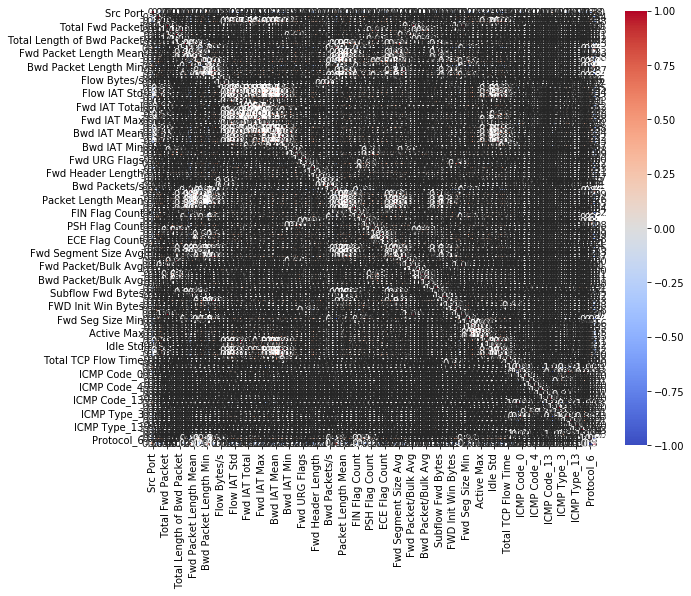

In [42]:
# Generate a correlation matrix
correlation_matrix = df.corr()



In [ ]:
correlation_matrix[correlation_matrix>]

{'Total Fwd Packet': 1.0,
 'Fwd Packet/Bulk Avg': 0.9913273245160767,
 'Fwd Act Data Pkts': 0.9960868999605411}

In [91]:
corr_chk = []

for c in correlation_matrix.columns:
    corr_chk.append({"var":c, "value":str(dict(correlation_matrix.loc[c][(correlation_matrix.loc[c]>0.95) & (correlation_matrix.loc[c]<1)]))})
                    
                    

In [92]:
corr_chk

[{'var': 'Src Port', 'value': '{}'},
 {'var': 'Dst Port', 'value': '{}'},
 {'var': 'Flow Duration', 'value': "{'Bwd IAT Total': 0.9937881742005485}"},
 {'var': 'Total Fwd Packet',
  'value': "{'Fwd Packet/Bulk Avg': 0.9913273245160767, 'Fwd Act Data Pkts': 0.9960868999605411}"},
 {'var': 'Total Bwd packets',
  'value': "{'Total Length of Bwd Packet': 0.9964828011971225, 'ACK Flag Count': 0.9854491121363008}"},
 {'var': 'Total Length of Fwd Packet',
  'value': "{'Fwd Bytes/Bulk Avg': 0.985060969982313}"},
 {'var': 'Total Length of Bwd Packet',
  'value': "{'Total Bwd packets': 0.9964828011971225, 'ACK Flag Count': 0.9821688694116226}"},
 {'var': 'Fwd Packet Length Max',
  'value': "{'Fwd Packet Length Std': 0.9675557387983725}"},
 {'var': 'Fwd Packet Length Min',
  'value': "{'Packet Length Min': 0.9949457112229516}"},
 {'var': 'Fwd Packet Length Mean',
  'value': "{'Subflow Fwd Bytes': 0.9758875388409178}"},
 {'var': 'Fwd Packet Length Std',
  'value': "{'Fwd Packet Length Max': 0.9675

In [93]:
df_corr_chk = pd.DataFrame(corr_chk)

In [94]:
df_corr_chk.loc[96]['value']

'{}'

In [96]:
df_corr_chk[df_corr_chk['value'] != "{}" ]

,var,value
2,Flow Duration,{'Bwd IAT Total': 0.9937881742005485}
3,Total Fwd Packet,"{'Fwd Packet/Bulk Avg': 0.9913273245160767, 'F..."
4,Total Bwd packets,{'Total Length of Bwd Packet': 0.9964828011971...
5,Total Length of Fwd Packet,{'Fwd Bytes/Bulk Avg': 0.985060969982313}
6,Total Length of Bwd Packet,"{'Total Bwd packets': 0.9964828011971225, 'ACK..."
7,Fwd Packet Length Max,{'Fwd Packet Length Std': 0.9675557387983725}
8,Fwd Packet Length Min,{'Packet Length Min': 0.9949457112229516}
9,Fwd Packet Length Mean,{'Subflow Fwd Bytes': 0.9758875388409178}
10,Fwd Packet Length Std,{'Fwd Packet Length Max': 0.9675557387983725}
11,Bwd Packet Length Max,{'Bwd Packet Length Std': 0.9697515119835031}


In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Show the plot
plt.show()

In [41]:
df.describe()

,Label,Label_cat
0,0,BENIGN
1,0,BENIGN
2,0,BENIGN
3,0,BENIGN
4,0,BENIGN
...,...,...
12577732,0,BENIGN
12577733,0,BENIGN
12577734,0,BENIGN
12577735,0,BENIGN


In [100]:
path_to_folder

'/Users/djk/Documents/DATA/RESEARCH/Code/PhD/logAD/robustad_with_noise/raw_data/cic18_improved'

In [80]:
# Split numerical and non-numerical columns
num_cols = df.select_dtypes(exclude=["object", "category"]).columns.tolist()
cat_cols = df.select_dtypes(include=["category", "object"]).columns.tolist()

In [82]:
cat_cols

['Label_cat']

In [87]:
df.columns

Index(['Src Port', 'Dst Port', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
      

In [89]:
df['ICMP Type'].unique()

array([-1,  8,  3, 11,  0])

### ML models

In [90]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [91]:
idx = np.random.randint(0, df.shape[0], df.shape[0])
training_sets = df.iloc[idx[:int(len(df)*.8)]]
test_sets = df.iloc[idx[int(len(df)*.8):]]
scaler = MinMaxScaler()

x_columns = list(df.columns)
x_columns.remove('Label')
x_columns.remove('Label_cat')

scaler.fit(training_sets[x_columns])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(scaler.transform(training_sets[x_columns]))